Group Name: **TexTitan**

**Members:**

Ali Shadman Yazdi

Mohammadreza Javadi Namin

Nastaran Ghaffari Elkhechi

This note book is consists of 2 subtasks each subtask having 2 datasets, and for each dataset 2-3 methods have been used.

**Tip:** To easily navigate through the notebook you can use the table of content on the side (aka the outline).

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/NLP FREE  ##path to  datasets

Mounted at /gdrive
/gdrive/MyDrive/NLP FREE


In [ ]:
pip install transformers

# **1. SUBTASK 1**

Importing subtask 1 datasets (English and Spanish)

In [ ]:
import os
import pandas as pd

subtask1_EN_df =pd.read_csv('subtask1_train_en.tsv', sep='\t')
subtask1_ES_df =pd.read_csv('subtask1_train_es.tsv', sep='\t')
del subtask1_EN_df['id']
del subtask1_ES_df['id']
subtask1_ALL_df =pd.concat([subtask1_EN_df,subtask1_ES_df], axis = 0)
subtask1_ALL_df = subtask1_ALL_df.sample(frac = 1)
subtask1_ALL_df = subtask1_ALL_df.sample(frac = 1)
subtask1_ALL_df = subtask1_ALL_df.sample(frac = 1)
subtask1_EN_deep_df =  subtask1_EN_df
subtask1_ES_deep_df =  subtask1_ES_df
subtask1_ALL_deep_df = subtask1_ALL_df
print(subtask1_EN_df.shape)
subtask1_EN_df.head()

(33845, 2)


,text,label
0,you need to stop the engine and wait until it ...,generated
1,The Commission shall publish the report; an in...,generated
2,"I have not been tweeting a lot lately, but I d...",generated
3,I pass my exam and really thankgod for that bu...,human
4,The template will have 3 parts: a mustache sha...,human


## Dataset Inspection

class distribution

In [ ]:
################################################################ checking class distribution
print( "English Dataset:")
print(subtask1_EN_df['label'].value_counts(1),"\n  \n")

print( "Spanish Dataset:")
print(subtask1_ES_df['label'].value_counts(1),"\n")
print("Both dataset's targets are distributed equally, stratified spliting will applied ")


English Dataset:
human        0.503649
generated    0.496351
Name: label, dtype: float64 
  

Spanish Dataset:
generated    0.50761
human        0.49239
Name: label, dtype: float64 

Both dataset's targets are distributed equally, stratified spliting will applied 


Missing values

In [ ]:
################################################################# Missing values
print( "English Dataset:")
print(subtask1_EN_df.isna().sum(),"\n  \n")

print( "Spanish Dataset:")
print(subtask1_ES_df.isna().sum(),"\n")
print("No missing data. ")

English Dataset:
text     0
label    0
dtype: int64 
  

Spanish Dataset:
text     0
label    0
dtype: int64 

No missing data. 


Dubicate Data

In [ ]:
################################################################# Missing values
print( "English Dataset:")
print( "There is" ,subtask1_EN_df.duplicated().sum() , "dublicate values.","\n  \n")

print( "Spanish Dataset:")
print( "There is" ,subtask1_ES_df.duplicated().sum() , "dublicate values." ,"\n")
print("No missing value ")

English Dataset:
There is 0 dublicate values. 
  

Spanish Dataset:
There is 0 dublicate values. 

No missing value 


In [ ]:
print("English Dataset:")
print("1. WORD-COUNT")
subtask1_EN_df['word_count'] = subtask1_EN_df['text'].apply(lambda x: len(str(x).split()))
print(subtask1_EN_df[subtask1_EN_df['label']=="human"]['word_count'].mean())
print(subtask1_EN_df[subtask1_EN_df['label']=="generated"]['word_count'].mean())
print()
print(" 2.CHARACTER-COUNT")
subtask1_EN_df['char_count'] = subtask1_EN_df['text'].apply(lambda x: len(str(x)))
print(subtask1_EN_df[subtask1_EN_df['label']=="human"]['char_count'].mean())
print(subtask1_EN_df[subtask1_EN_df['label']=="generated"]['char_count'].mean())
print()
print("3. UNIQUE WORD-COUNT")
subtask1_EN_df['unique_word_count'] = subtask1_EN_df['text'].apply(lambda x: len(set(str(x).split())))
print(subtask1_EN_df[subtask1_EN_df['label']=="human"]['unique_word_count'].mean()) #1
print(subtask1_EN_df[subtask1_EN_df['label']=="generated"]['unique_word_count'].mean()) #0
print("\n ########################## \n  ")

print("Spanish Dataset:")
print("1. WORD-COUNT")
subtask1_ES_df['word_count'] = subtask1_ES_df['text'].apply(lambda x: len(str(x).split()))
print(subtask1_ES_df[subtask1_ES_df['label']=="human"]['word_count'].mean())
print(subtask1_ES_df[subtask1_ES_df['label']=="generated"]['word_count'].mean())
print()
print(" 2.CHARACTER-COUNT")
subtask1_ES_df['char_count'] = subtask1_ES_df['text'].apply(lambda x: len(str(x)))
print(subtask1_ES_df[subtask1_ES_df['label']=="human"]['char_count'].mean())
print(subtask1_ES_df[subtask1_ES_df['label']=="generated"]['char_count'].mean())
print()
print("3. UNIQUE WORD-COUNT")
subtask1_ES_df['unique_word_count'] = subtask1_ES_df['text'].apply(lambda x: len(set(str(x).split())))
print(subtask1_ES_df[subtask1_ES_df['label']=="human"]['unique_word_count'].mean()) #1
print(subtask1_ES_df[subtask1_ES_df['label']=="generated"]['unique_word_count'].mean()) #0

English Dataset:
1. WORD-COUNT
52.24445617740232
55.09619620215489

 2.CHARACTER-COUNT
297.1298251789276
313.4907434966367

3. UNIQUE WORD-COUNT
40.57010442332512
42.30936365259837

 ########################## 
  
Spanish Dataset:
1. WORD-COUNT
50.73775891556344
53.37745007680491

 2.CHARACTER-COUNT
297.1213656806233
316.6717050691244

3. UNIQUE WORD-COUNT
38.609805536200675
40.76024577572964


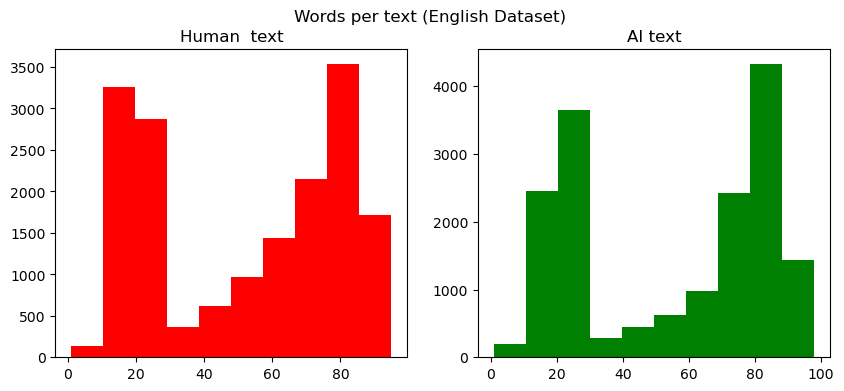

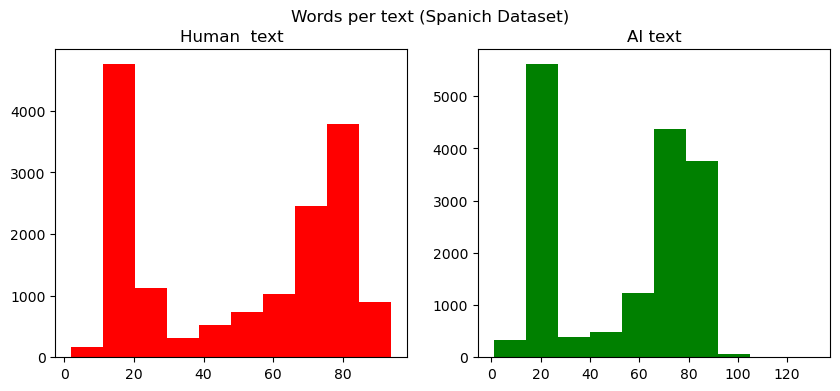

In [ ]:
#Plotting word-count per text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=subtask1_EN_df[subtask1_EN_df['label']=="human"]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Human  text')
train_words=subtask1_EN_df[subtask1_EN_df['label']=="generated"]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('AI text')
fig.suptitle('Words per text (English Dataset)')
plt.show()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=subtask1_ES_df[subtask1_ES_df['label']=="human"]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Human  text')
train_words=subtask1_ES_df[subtask1_ES_df['label']=="generated"]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('AI text')
fig.suptitle('Words per text (Spanich Dataset)')
plt.show()

## **1.1 Subtask 1 --> English**

### 1.1.1 Traditional Machine learning methods

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Preprocessing functions

In [ ]:
# Convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace

    return text


# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)


# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

subtask1_EN_df['clean_text'] = subtask1_EN_df['text'].apply(lambda x: finalpreprocess(x))
# subtask1_EN_df=subtask1_EN_df.drop(columns=['word_count','char_count','unique_word_count'])
subtask1_EN_df.tail()

,text,label,clean_text
33840,"@PierreJoye i have a server already, thanks fo...",human,pierrejoye server already thank offer problem ...
33841,10. Article 13 of Council Directive 80/777/EEC...,human,article council directive eec july approximati...
33842,"Crying because I have to cry for you?. No. No,...",generated,cry cry itll right
33843,"However, it will continue to offer customers a...",generated,however continue offer customer wide range ser...
33844,"@kamitchell I suppose, but I figure Aubrey de ...",human,kamitchell suppose figure aubrey de grey figur...


Tockenizing

In [ ]:
import random

# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
subtask1_EN_df['clean_text_tok']=[nltk.word_tokenize(i) for i in subtask1_EN_df['text']] ###using NORMAL TEXT HAD BETTER PERFORMANCE COMAPRED TO CLEAN TEXT
model = Word2Vec(subtask1_EN_df['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector


class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

Data spliting (stratified spliting)

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION

# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(subtask1_EN_df["text"],
                                                  subtask1_EN_df["label"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

Logistic Regression(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

y_test = y_val.map({'human': 1, 'generated': 0}).astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

   generated       0.77      0.78      0.78      3386
       human       0.78      0.77      0.77      3383

    accuracy                           0.77      6769
   macro avg       0.77      0.77      0.77      6769
weighted avg       0.77      0.77      0.77      6769

Confusion Matrix: 
 [[2642  744]
 [ 785 2598]]
AUC: 0.8631614868756765


Naive Bayes(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

y_test = y_val.map({'human': 1, 'generated': 0}).astype(int)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)


              precision    recall  f1-score   support

   generated       0.66      0.84      0.74      3386
       human       0.78      0.56      0.65      3383

    accuracy                           0.70      6769
   macro avg       0.72      0.70      0.69      6769
weighted avg       0.72      0.70      0.69      6769

Confusion Matrix: 
 [[2840  546]
 [1490 1893]]
AUC: 0.8029260649517698


Logistic Regression (W2v)

In [ ]:
# FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

y_test = y_val.map({'human': 1, 'generated': 0}).astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

   generated       0.77      0.78      0.77      3386
       human       0.77      0.77      0.77      3383

    accuracy                           0.77      6769
   macro avg       0.77      0.77      0.77      6769
weighted avg       0.77      0.77      0.77      6769

Confusion Matrix: 
 [[2633  753]
 [ 791 2592]]
AUC: 0.8562321876573027


In [ ]:
text1 = "I am a bit hungery and my boyfirend is still working, I wish he could coock for me but he is still working, meanwhile I will eat a banana"
text2 = "I am feeling a bit hungry and my boyfriend is still working. Although I wish he could cook for me, I understand he is still occupied. In the meantime, I will have a banana."
text3 ="I'm feeling a little hungry, and unfortunately, my boyfriend is still at work, so I wish he could prepare a meal for me. However, since he's still working, I'll have a banana in the meantime."





text4= "there is this guy who is working on his project at 2 am in the night, instead of sleeping he is working very hard. He should go to sleep soon and he will go to sleep soon or he ll regret it tomorrow"
text5 = "There's a man diligently working on his project at 2 am, sacrificing sleep for his endeavor. It's crucial for him to rest soon, or he will inevitably face regret in the coming day."
text6 = "At 2 am in the night, there's an individual engrossed in his project, putting in tremendous effort instead of getting some sleep. It's imperative for him to prioritize rest and he will soon do so; otherwise, he'll experience regret tomorrow."


interpretability

Text written by me

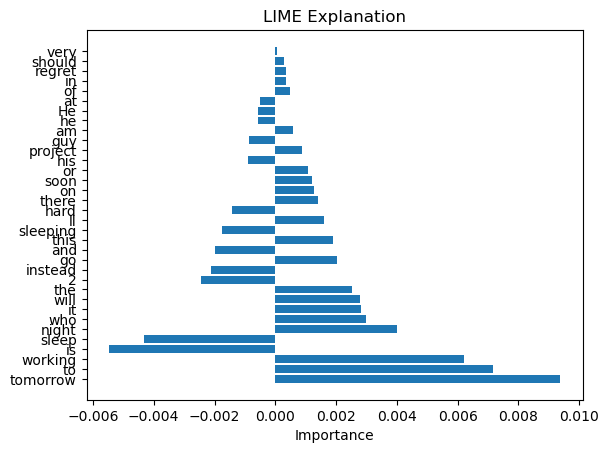

Probablity of human written text:  0.999973212646079 %


In [ ]:
import lime
from lime import lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

explainer = lime_text.LimeTextExplainer(class_names=[0,1])
predict_fn = lambda x: lr_w2v.predict_proba(modelw.transform(x))
explanation = explainer.explain_instance(text4, predict_fn, num_features=1000)

# Get the top features and their importance according to LIME
top_features = explanation.as_list()

# Extract the feature names and importance values
feature, importance = zip(*top_features)

# Create a horizontal bar plot to visualize the feature importances
plt.barh(range(len(feature)), importance, align='center')
plt.yticks(range(len(feature)), feature)
plt.xlabel('Importance')
plt.title('LIME Explanation')

# Display the plot
plt.show()

## Probablity of being writen by human
probability = lr_w2v.predict_proba(text_tok4)[0][1]
print("Probablity of human written text: " , probability, "%")

asked chat GPT to RE-WRITE the sentence for me

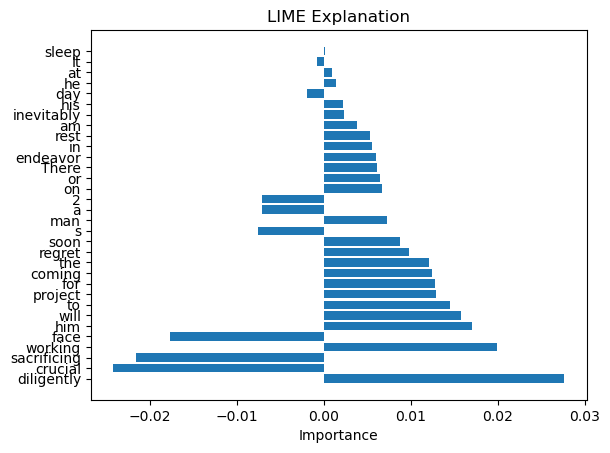

Probablity of human written text:  0.9886512594757079 %


In [ ]:
import lime
from lime import lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

explainer = lime_text.LimeTextExplainer(class_names=[0,1])
predict_fn = lambda x: lr_w2v.predict_proba(modelw.transform(x))
explanation = explainer.explain_instance(text5, predict_fn, num_features=1000)

# Get the top features and their importance according to LIME
top_features = explanation.as_list()

# Extract the feature names and importance values
feature, importance = zip(*top_features)

# Create a horizontal bar plot to visualize the feature importances
plt.barh(range(len(feature)), importance, align='center')
plt.yticks(range(len(feature)), feature)
plt.xlabel('Importance')
plt.title('LIME Explanation')

# Display the plot
plt.show()

## Probablity of being writen by human
probability = lr_w2v.predict_proba(text_tok5)[0][1]
print("Probablity of human written text: " , probability, "%")

Asked chat GPT to RE-PHRASE the sentence for me:

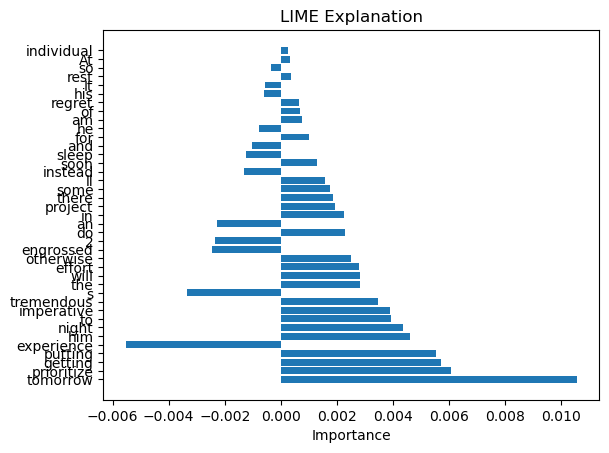

Probablity of human written text:  0.0700480484903623 %


In [ ]:
import lime
from lime import lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

explainer = lime_text.LimeTextExplainer(class_names=[0,1])
predict_fn = lambda x: lr_w2v.predict_proba(modelw.transform(x))
explanation = explainer.explain_instance(text6, predict_fn, num_features=1000)

# Get the top features and their importance according to LIME
top_features = explanation.as_list()

# Extract the feature names and importance values
feature, importance = zip(*top_features)

# Create a horizontal bar plot to visualize the feature importances
plt.barh(range(len(feature)), importance, align='center')
plt.yticks(range(len(feature)), feature)
plt.xlabel('Importance')
plt.title('LIME Explanation')

# Display the plot
plt.show()

## Probablity of being writen by human
probability = lr_w2v.predict_proba(text_tok6)[0][1]
print("Probablity of human written text: " , probability, "%")

### 1.1.2 Deep Learning method

In [ ]:
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from transformers import RobertaForSequenceClassification
from transformers import AutoTokenizer, XLMRobertaModel


import numpy as np
from transformers import RobertaTokenizer


Changing Target value from letters to numbers

In [ ]:
possible_labels = subtask1_EN_deep_df.label.unique()
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'generated': 0, 'human': 1}

In [ ]:
subtask1_EN_deep_df['label'] = subtask1_EN_deep_df.label.replace(label_dict)
subtask1_EN_deep_df.head()

,text,label
0,you need to stop the engine and wait until it ...,0
1,The Commission shall publish the report; an in...,0
2,"I have not been tweeting a lot lately, but I d...",0
3,I pass my exam and really thankgod for that bu...,1
4,The template will have 3 parts: a mustache sha...,1


Data spliting (stratified spliting)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(subtask1_EN_deep_df.index.values,
                                                  subtask1_EN_deep_df.label.values,
                                                  test_size=0.20,
                                                  random_state=42,
                                                  stratify=subtask1_EN_deep_df.label.values)

subtask1_EN_deep_df['data_type'] = ['not_set']*subtask1_EN_deep_df.shape[0]

subtask1_EN_deep_df.loc[X_train, 'data_type'] = 'train'
subtask1_EN_deep_df.loc[X_val, 'data_type'] = 'val'

Tokenizing the data based on the model we are going to use

In [ ]:
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
#                                       #    "bert-large-uncased",    ### Other models have been tried however roberta model gave the best performance
#                                           do_lower_case=True)

tokenizer = RobertaTokenizer.from_pretrained(#"roberta-base",
                                             "roberta-base-openai-detector",  ## is a model fine-tuned by OpenAI on the outputs of the 1.5B-parameter GPT-2 model.
                                              do_lower_case=False)

# tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")


encoded_data_train = tokenizer.batch_encode_plus(
    subtask1_EN_deep_df[subtask1_EN_deep_df.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    subtask1_EN_deep_df[subtask1_EN_deep_df.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']  ### is our tokenize data
attention_masks_train = encoded_data_train['attention_mask'] ### is our attenmask based in the window
labels_train = torch.tensor(subtask1_EN_deep_df[subtask1_EN_deep_df.data_type=='train'].label.values) ## the lables..

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(subtask1_EN_deep_df[subtask1_EN_deep_df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Prepare the model we are going to use for the classification task

In [ ]:
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
#                                                       #"bert-large-uncased",
#                                                       num_labels=2,
#                                                       output_attentions=True,
#                                                       output_hidden_states=True)


model = RobertaForSequenceClassification.from_pretrained(#"bert-base-uncased",
                                                      #"roberta-base",
                                                      "roberta-base-openai-detector",
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batching our dataset

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

seting up the optimizer and scheduler for training the model

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

epochs = 4

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Functions to evaluate the model

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

Use GPU if available

In [ ]:
import torch

# Just right before the actual usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Training loop

In [ ]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    # torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/6769 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.3878642309694555
Validation loss: 0.4869744487482795
F1 Score (Weighted): 0.9066968580535221


Epoch 2:   0%|          | 0/6769 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.17428172552298035
Validation loss: 0.5073027420829148
F1 Score (Weighted): 0.9179609806398884


Epoch 3:   0%|          | 0/6769 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.06508614531960559
Validation loss: 1.0376572443657917
F1 Score (Weighted): 0.867779574944041


Epoch 4:   0%|          | 0/6769 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.023032205795159685
Validation loss: 0.8013689349228115
F1 Score (Weighted): 0.9145793686494376


for best performance model needs to be retrained with ideal number of epotch 2 for this case.

Model interpretability

*   First text Human generated
*   Second text re-written by chat GPT
*   Third text re-phrased by chat GPT

In [ ]:
text1 = "I am a bit hungery and my boyfirend is still working, I wish he could coock for me but he is still working, meanwhile I will eat a banana"
text2 = "I am feeling a bit hungry and my boyfriend is still working. Although I wish he could cook for me, I understand he is still occupied. In the meantime, I will have a banana."
text3 ="I'm feeling a little hungry, and unfortunately, my boyfriend is still at work, so I wish he could prepare a meal for me. However, since he's still working, I'll have a banana in the meantime."



text4= "there is this guy who is working on his project at 2 am in the night, instead of sleeping he is working very hard. He should go to sleep soon and he will go to sleep soon or he ll regret it tomorrow"
text5 = "There's a man diligently working on his project at 2 am, sacrificing sleep for his endeavor. It's crucial for him to rest soon, or he will inevitably face regret in the coming day."
text6 = "At 2 am in the night, there's an individual engrossed in his project, putting in tremendous effort instead of getting some sleep. It's imperative for him to prioritize rest and he will soon do so; otherwise, he'll experience regret tomorrow."



text7="hello my name is ALi and I AM WORKIng on this project, I am trying to figure out if my model can detect if this was written by me  or by chat gpt. however this text is written by me and I am trying to type more and more so I can have a large text for my moder for it to be able to classify. again i repeat I wrote this text by myself I am going to have some spelling mistakes like this txt has some porblems! "
text8="Hello, my name is Ali, and I am working on a project. My goal is to determine whether my model can distinguish between text written by me and text generated by ChatGPT. However, this particular text has been written by me, and I am attempting to type more content to provide a substantial amount for my model to classify. I want to emphasize that I authored this text personally. Consequently, there might be some spelling errors and issues within this text, such as the presence of problems in this sentence."
text9= "Greetings, my name is Ali, and I am actively engaged in a project. My objective is to determine whether my model can discern between text originating from me and text generated by ChatGPT. It is important to note that the current text has been personally composed by me, and my aim is to produce an extensive body of text to facilitate accurate classification by my model. Once again, I want to reiterate that I am the sole author of this text, and it is expected to contain some spelling errors, such as the presence of problems in this particular piece of text."

In [ ]:
text = "Your input text goes here."

# Tokenize and encode the text
inputs = tokenizer.encode_plus(
    text7,    ########################## change text here
    add_special_tokens=True,
    max_length=256,
    padding='max_length',
    return_attention_mask=True,
    return_tensors='pt'
)

input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    logits = outputs[0]
    probabilities = torch.nn.functional.softmax(logits, dim=1)

print("probablity of text being human generated:")
class_probabilities = probabilities[0][1].cpu().numpy()
class_probabilities

probablity of text being human generated:


array(0.9999796, dtype=float32)

In [ ]:
pip install transformers-interpret


In [ ]:
from transformers_interpret import SequenceClassificationExplainer
cls_explainer = SequenceClassificationExplainer(model, tokenizer )

In [ ]:
word_attributions = cls_explainer(text1) ### Human generated
cls_explainer.predicted_class_name
cls_explainer.visualize()

In [ ]:
word_attributions = cls_explainer(text5) ### re written by chat GPT
cls_explainer.predicted_class_name
cls_explainer.visualize()

In [ ]:
word_attributions = cls_explainer(text9) ### re phrased by chat GPT
cls_explainer.predicted_class_name
cls_explainer.visualize()

## **1.2 Subtask 1 --> Spanish**

### 1.2.1 Traditional Machine learning methods

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Preprocessing functions

In [ ]:
# Convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace

    return text


# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('spanish')]
    return ' '.join(a)


# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

subtask1_EN_df['clean_text'] = subtask1_ES_df['text'].apply(lambda x: finalpreprocess(x))
# subtask1_EN_df=subtask1_EN_df.drop(columns=['word_count','char_count','unique_word_count'])
subtask1_EN_df.tail()

,text,label,word_count,char_count,unique_word_count,clean_text,clean_text_tok
33840,"@PierreJoye i have a server already, thanks fo...",human,20,104,19,NaN,"[@, PierreJoye, i, have, a, server, already, ,..."
33841,10. Article 13 of Council Directive 80/777/EEC...,human,84,470,51,NaN,"[10, ., Article, 13, of, Council, Directive, 8..."
33842,"Crying because I have to cry for you?. No. No,...",generated,17,75,16,NaN,"[Crying, because, I, have, to, cry, for, you, ..."
33843,"However, it will continue to offer customers a...",generated,88,600,72,NaN,"[However, ,, it, will, continue, to, offer, cu..."
33844,"@kamitchell I suppose, but I figure Aubrey de ...",human,22,118,20,NaN,"[@, kamitchell, I, suppose, ,, but, I, figure,..."


Tockenizing

In [ ]:
import random

# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
subtask1_ES_df['clean_text_tok']=[nltk.word_tokenize(i) for i in subtask1_ES_df['text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(subtask1_ES_df['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector


class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

Data spliting (stratified spliting)

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION

# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(subtask1_ES_df["text"],
                                                  subtask1_ES_df["label"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

Logistic Regression(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

y_test = y_val.map({'human': 1, 'generated': 0}).astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

   generated       0.80      0.82      0.81      3243
       human       0.81      0.79      0.80      3170

    accuracy                           0.80      6413
   macro avg       0.80      0.80      0.80      6413
weighted avg       0.80      0.80      0.80      6413

Confusion Matrix: 
 [[2653  590]
 [ 676 2494]]
AUC: 0.8883392621428731


Naive Bayes(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

y_test = y_val.map({'human': 1, 'generated': 0}).astype(int)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)


              precision    recall  f1-score   support

   generated       0.68      0.88      0.77      3243
       human       0.83      0.58      0.69      3170

    accuracy                           0.74      6413
   macro avg       0.76      0.73      0.73      6413
weighted avg       0.76      0.74      0.73      6413

Confusion Matrix: 
 [[2860  383]
 [1316 1854]]
AUC: 0.8447816262350065


Logistic Regression (W2v)

In [ ]:
# FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

y_test = y_val.map({'human': 1, 'generated': 0}).astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

   generated       0.72      0.76      0.74      3243
       human       0.74      0.70      0.72      3170

    accuracy                           0.73      6413
   macro avg       0.73      0.73      0.73      6413
weighted avg       0.73      0.73      0.73      6413

Confusion Matrix: 
 [[2462  781]
 [ 960 2210]]
AUC: 0.8080396408279515


### 1.2.2 Deep Learning method

In [ ]:
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from transformers import RobertaForSequenceClassification
from transformers import AutoTokenizer, XLMRobertaModel


import numpy as np
from transformers import RobertaTokenizer


Changing Target value from letters to numbers

In [ ]:
possible_labels = subtask1_ES_deep_df.label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

subtask1_ES_deep_df['label'] = subtask1_ES_deep_df.label.replace(label_dict)
subtask1_ES_deep_df.head()

,text,label
0,Entrada en vigor. La presente Directiva entrar...,0
1,Preguntas: 1. ¿Cuáles son los principales argu...,1
2,¿Desea algo? Póngame una caja de madera. ¿Qué ...,1
3,"@victor28088 1665 Tweets no originales, que as...",0
4,De pequeño Dios me dio a elegir entre tener un...,0


Data spliting (stratified spliting)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(subtask1_ES_deep_df.index.values,
                                                  subtask1_ES_deep_df.label.values,
                                                  test_size=0.20,
                                                  random_state=42,
                                                  stratify=subtask1_ES_deep_df.label.values)

subtask1_ES_deep_df['data_type'] = ['not_set']*subtask1_ES_deep_df.shape[0]

subtask1_ES_deep_df.loc[X_train, 'data_type'] = 'train'
subtask1_ES_deep_df.loc[X_val, 'data_type'] = 'val'

Tokenizing the data based on the model we are going to use

In [ ]:
tokenizer = BertTokenizer.from_pretrained(#'bert-base-uncased',
                                          "bert-base-multilingual-cased",   ###### Here we are going to train with bert multilingual model
                                          do_lower_case=False)             ## using large model provides better results but more computational time and units

# tokenizer = RobertaTokenizer.from_pretrained("roberta-base",
#                                           do_lower_case=True)

# tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")


encoded_data_train = tokenizer.batch_encode_plus(
    subtask1_ES_deep_df[subtask1_ES_deep_df.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    subtask1_ES_deep_df[subtask1_ES_deep_df.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']  ### is our tokenize data
attention_masks_train = encoded_data_train['attention_mask'] ### is our attenmask based in the window
labels_train = torch.tensor(subtask1_ES_deep_df[subtask1_ES_deep_df.data_type=='train'].label.values) ## the lables..

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(subtask1_ES_deep_df[subtask1_ES_deep_df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Prepare the model we are going to use for the classification task

In [ ]:
model = BertForSequenceClassification.from_pretrained(#"bert-large-uncased",
                                                      "bert-base-multilingual-cased",
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)


# model = RobertaForSequenceClassification.from_pretrained(#"bert-base-uncased",
#                                                       "roberta-base",
#                                                       num_labels=6,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

Batching our dataset

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

seting up the optimizer and scheduler for training the model

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Functions to evaluate the model

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

Use GPU if available

In [ ]:
import torch

# Just right before the actual usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Training loop

In [ ]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    # torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/6413 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.47532223425178927
Validation loss: 0.5380601798038116
F1 Score (Weighted): 0.8723289297807514


Epoch 2:   0%|          | 0/6413 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.30020048990670234
Validation loss: 0.5887194297619931
F1 Score (Weighted): 0.8834807672369887


Epoch 3:   0%|          | 0/6413 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.15324799902479255
Validation loss: 0.5887938233735329
F1 Score (Weighted): 0.9104892007794417


Epoch 4:   0%|          | 0/6413 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.0730001238648401
Validation loss: 0.8881006266825078
F1 Score (Weighted): 0.8869448894694201


Epoch 5:   0%|          | 0/6413 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.02553880605383048
Validation loss: 0.8854480626509971
F1 Score (Weighted): 0.9016087233150225


Model starts to overfit after epotch 3, need to retrain with only 3 epotch for optimal performance.

## **1.3 Subtask 1 --> Spanglish**

### 1.3.1 Traditional Machine learning methods

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Preprocessing functions

In [ ]:
# Convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace

    return text


# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)


# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

subtask1_ALL_df['clean_text'] = subtask1_ALL_df['text'].apply(lambda x: finalpreprocess(x))
# subtask1_ALL_df=subtask1_ALL_df.drop(columns=['word_count','char_count','unique_word_count'])
subtask1_ALL_df.tail()

,text,label,clean_text
26160,.. and rejected for the remainder. Article 3 T...,human,reject remainder article amount set article sh...
13018,Add ½ tablet or ½ tsp. (2.5 ml) of liquid renn...,human,add ½ tablet ½ tsp ml liquid rennet ¼ cup ml c...
7387,The leaves may already be yellow or youll see ...,human,leaf may already yellow youll see webs spider ...
18138,"@user Ambientado también en Italia, es una com...",human,user ambientado también en italia e una comedi...
2294,Se puede personalizar el nivel de sonido. En l...,generated,se puede personalizar el nivel de sonido en la...


Tockenizing

In [ ]:
import random

# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
subtask1_ALL_df['clean_text_tok']=[nltk.word_tokenize(i) for i in subtask1_ALL_df['text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(subtask1_ALL_df['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector


class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

Data spliting (stratified spliting)

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION

# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(subtask1_ALL_df["text"],
                                                  subtask1_ALL_df["label"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

Logistic Regression(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

y_test = y_val.map({'human': 1, 'generated': 0}).astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

   generated       0.78      0.79      0.78      6646
       human       0.78      0.77      0.77      6536

    accuracy                           0.78     13182
   macro avg       0.78      0.78      0.78     13182
weighted avg       0.78      0.78      0.78     13182

Confusion Matrix: 
 [[5239 1407]
 [1520 5016]]
AUC: 0.8678690967703677


Naive Bayes(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

y_test = y_val.map({'human': 1, 'generated': 0}).astype(int)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)


              precision    recall  f1-score   support

   generated       0.67      0.86      0.75      6646
       human       0.79      0.57      0.66      6536

    accuracy                           0.71     13182
   macro avg       0.73      0.71      0.71     13182
weighted avg       0.73      0.71      0.71     13182

Confusion Matrix: 
 [[5686  960]
 [2821 3715]]
AUC: 0.8157559778643046


Logistic Regression (W2v)

In [ ]:
# FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

y_test = y_val.map({'human': 1, 'generated': 0}).astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

   generated       0.72      0.74      0.73      6646
       human       0.73      0.70      0.71      6536

    accuracy                           0.72     13182
   macro avg       0.72      0.72      0.72     13182
weighted avg       0.72      0.72      0.72     13182

Confusion Matrix: 
 [[4933 1713]
 [1959 4577]]
AUC: 0.8001419301916726


In [ ]:
text1 = "I am a bit hungery and my boyfirend is still working, I wish he could coock for me but he is still working, meanwhile I will eat a banana"
text2 = "I am feeling a bit hungry and my boyfriend is still working. Although I wish he could cook for me, I understand he is still occupied. In the meantime, I will have a banana."
text3 ="I'm feeling a little hungry, and unfortunately, my boyfriend is still at work, so I wish he could prepare a meal for me. However, since he's still working, I'll have a banana in the meantime."





text4= "there is this guy who is working on his project at 2 am in the night, instead of sleeping he is working very hard. He should go to sleep soon and he will go to sleep soon or he ll regret it tomorrow"
text5 = "There's a man diligently working on his project at 2 am, sacrificing sleep for his endeavor. It's crucial for him to rest soon, or he will inevitably face regret in the coming day."
text6 = "At 2 am in the night, there's an individual engrossed in his project, putting in tremendous effort instead of getting some sleep. It's imperative for him to prioritize rest and he will soon do so; otherwise, he'll experience regret tomorrow."


interpretability

Text written by me

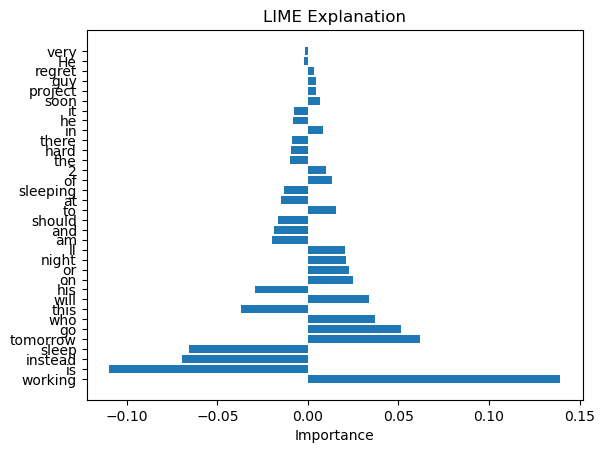

Probablity of human written text:  0.03391355016925377 %


In [ ]:
import lime
from lime import lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
text = text4########## change text here

explainer = lime_text.LimeTextExplainer(class_names=[0,1])
predict_fn = lambda x: lr_w2v.predict_proba(modelw.transform(x))
explanation = explainer.explain_instance(text, predict_fn, num_features=1000)

# Get the top features and their importance according to LIME
top_features = explanation.as_list()

# Extract the feature names and importance values

# Create a horizontal bar plot to visualize the feature importances
plt.barh(range(len(feature)), importance, align='center')
plt.yticks(range(len(feature)), feature)
plt.xlabel('Importance')
plt.title('LIME Explanation')

# Display the plot
plt.show()

## Probablity of being writen by human
probability = lr_w2v.predict_proba(modelw.transform(text))[0][1]
print("Probablity of human written text: " , probability, "%")

asked chat GPT to RE-WRITE the sentence for me

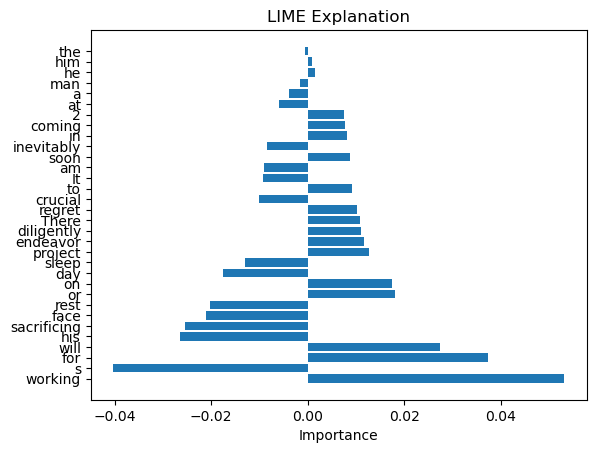

Probablity of human written text:  0.9637202615461644 %


In [ ]:
import lime
from lime import lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

explainer = lime_text.LimeTextExplainer(class_names=[0,1])
predict_fn = lambda x: lr_w2v.predict_proba(modelw.transform(x))
explanation = explainer.explain_instance(text5, predict_fn, num_features=1000)

# Get the top features and their importance according to LIME
top_features = explanation.as_list()

# Extract the feature names and importance values
feature, importance = zip(*top_features)

# Create a horizontal bar plot to visualize the feature importances
plt.barh(range(len(feature)), importance, align='center')
plt.yticks(range(len(feature)), feature)
plt.xlabel('Importance')
plt.title('LIME Explanation')

# Display the plot
plt.show()

## Probablity of being writen by human
probability = lr_w2v.predict_proba(modelw.transform(text5))[0][1]
print("Probablity of human written text: " , probability, "%")

Asked chat GPT to RE-PHRASE the sentence for me:

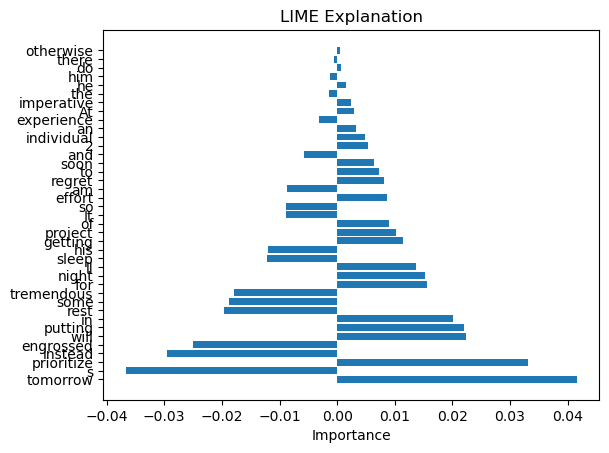

Probablity of human written text:  0.9637202615461644 %


In [ ]:
import lime
from lime import lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

explainer = lime_text.LimeTextExplainer(class_names=[0,1])
predict_fn = lambda x: lr_w2v.predict_proba(modelw.transform(x))
explanation = explainer.explain_instance(text6, predict_fn, num_features=1000)

# Get the top features and their importance according to LIME
top_features = explanation.as_list()

# Extract the feature names and importance values
feature, importance = zip(*top_features)

# Create a horizontal bar plot to visualize the feature importances
plt.barh(range(len(feature)), importance, align='center')
plt.yticks(range(len(feature)), feature)
plt.xlabel('Importance')
plt.title('LIME Explanation')

# Display the plot
plt.show()

## Probablity of being writen by human
probability = lr_w2v.predict_proba(modelw.transform(text5))[0][1]
print("Probablity of human written text: " , probability, "%")

### 1.3.2 Deep Learning method

In [ ]:
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from transformers import RobertaForSequenceClassification
from transformers import AutoTokenizer, XLMRobertaForSequenceClassification


import numpy as np
from transformers import RobertaTokenizer


Changing Target value from letters to numbers

In [ ]:
possible_labels = subtask1_ALL_deep_df.label.unique()
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'generated': 0, 'human': 1}

In [ ]:
subtask1_ALL_deep_df['label'] = subtask1_ALL_deep_df.label.replace(label_dict)
subtask1_ALL_deep_df.head()

,text,label
24725,EL CASO DE LAS CARTAS POSTALES: Las cartas pos...,0
25670,Ultimamente mi estabilidad emocional esta mas ...,1
8154,b) los productos fitosanitarios que contengan ...,0
28416,Esto significa desarmarlo para que puedas limp...,0
23499,"Para limpiar un derrame localizado, primero de...",0


Data spliting (stratified spliting)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(subtask1_ALL_deep_df.index.values,
                                                  subtask1_ALL_deep_df.label.values,
                                                  test_size=0.20,
                                                  random_state=42,
                                                  stratify=subtask1_ALL_deep_df.label.values)

subtask1_ALL_deep_df['data_type'] = ['not_set']*subtask1_ALL_deep_df.shape[0]

subtask1_ALL_deep_df.loc[X_train, 'data_type'] = 'train'
subtask1_ALL_deep_df.loc[X_val, 'data_type'] = 'val'

Tokenizing the data based on the model we are going to use

In [ ]:
tokenizer = BertTokenizer.from_pretrained(#'bert-base-uncased',
                                          "bert-base-multilingual-cased",
                                          #"bert-large-uncased",    ### Other models have been tried however roberta model gave the best performance
                                          do_lower_case=False)

# tokenizer = RobertaTokenizer.from_pretrained(#"roberta-base",
#                                              "roberta-base-openai-detector",  ## is a model fine-tuned by OpenAI on the outputs of the 1.5B-parameter GPT-2 model.
#                                               do_lower_case=False)

# tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")


encoded_data_train = tokenizer.batch_encode_plus(
    subtask1_ALL_deep_df[subtask1_ALL_deep_df.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    subtask1_ALL_deep_df[subtask1_ALL_deep_df.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']  ### is our tokenize data
attention_masks_train = encoded_data_train['attention_mask'] ### is our attenmask based in the window
labels_train = torch.tensor(subtask1_ALL_deep_df[subtask1_ALL_deep_df.data_type=='train'].label.values) ## the lables..

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(subtask1_ALL_deep_df[subtask1_ALL_deep_df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Prepare the model we are going to use for the classification task

In [ ]:
model = BertForSequenceClassification.from_pretrained(#"bert-base-uncased",
                                                      "bert-base-multilingual-cased",
                                                      #"bert-large-uncased",
                                                      num_labels=2,
                                                      output_attentions=True,
                                                      output_hidden_states=True)


# model = RobertaForSequenceClassification.from_pretrained(#"bert-base-uncased",
#                                                       #"roberta-base",
#                                                       "roberta-base-openai-detector",
#                                                       num_labels=2,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

Batching our dataset

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

seting up the optimizer and scheduler for training the model

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

epochs = 4

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Functions to evaluate the model

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

Use GPU if available

In [ ]:
import torch

# Just right before the actual usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Training loop

In [ ]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    # torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/14176 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.5402457956800834
Validation loss: 0.43543790584058334
F1 Score (Weighted): 0.9032349949753709


Epoch 2:   0%|          | 0/14176 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.3012043371135876
Validation loss: 0.5776688959770927
F1 Score (Weighted): 0.8933947019516422


Epoch 3:   0%|          | 0/14176 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.12715437440579516
Validation loss: 0.7863278153384738
F1 Score (Weighted): 0.8987927973416481


Epoch 4:   0%|          | 0/14176 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.04345515052240956
Validation loss: 0.8452281411618171
F1 Score (Weighted): 0.9032477632944883


for best performance model needs to be retrained with ideal number of epotch 2 for this case.

Model interpretability

*   First text Human generated
*   Second text re-written by chat GPT
*   Third text re-phrased by chat GPT

In [ ]:
text1 = "I am a bit hungery and my boyfirend is still working, I wish he could coock for me but he is still working, meanwhile I will eat a banana"
text2 = "I am feeling a bit hungry and my boyfriend is still working. Although I wish he could cook for me, I understand he is still occupied. In the meantime, I will have a banana."
text3 ="I'm feeling a little hungry, and unfortunately, my boyfriend is still at work, so I wish he could prepare a meal for me. However, since he's still working, I'll have a banana in the meantime."



text4= "there is this guy who is working on his project at 2 am in the night, instead of sleeping he is working very hard. He should go to sleep soon and he will go to sleep soon or he ll regret it tomorrow"
text5 = "There's a man diligently working on his project at 2 am, sacrificing sleep for his endeavor. It's crucial for him to rest soon, or he will inevitably face regret in the coming day."
text6 = "At 2 am in the night, there's an individual engrossed in his project, putting in tremendous effort instead of getting some sleep. It's imperative for him to prioritize rest and he will soon do so; otherwise, he'll experience regret tomorrow."



text7="hello my name is ALi and I AM WORKIng on this project, I am trying to figure out if my model can detect if this was written by me  or by chat gpt. however this text is written by me and I am trying to type more and more so I can have a large text for my moder for it to be able to classify. again i repeat I wrote this text by myself I am going to have some spelling mistakes like this txt has some porblems! "
text8="Hello, my name is Ali, and I am working on a project. My goal is to determine whether my model can distinguish between text written by me and text generated by ChatGPT. However, this particular text has been written by me, and I am attempting to type more content to provide a substantial amount for my model to classify. I want to emphasize that I authored this text personally. Consequently, there might be some spelling errors and issues within this text, such as the presence of problems in this sentence."
text9= "Greetings, my name is Ali, and I am actively engaged in a project. My objective is to determine whether my model can discern between text originating from me and text generated by ChatGPT. It is important to note that the current text has been personally composed by me, and my aim is to produce an extensive body of text to facilitate accurate classification by my model. Once again, I want to reiterate that I am the sole author of this text, and it is expected to contain some spelling errors, such as the presence of problems in this particular piece of text."

In [ ]:
text = "Your input text goes here."

# Tokenize and encode the text
inputs = tokenizer.encode_plus(
    text7,    ########################## change text here
    add_special_tokens=True,
    max_length=256,
    padding='max_length',
    return_attention_mask=True,
    return_tensors='pt'
)

input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    logits = outputs[0]
    probabilities = torch.nn.functional.softmax(logits, dim=1)

print("probablity of text being human generated:")
class_probabilities = probabilities[0][1].cpu().numpy()
class_probabilities

probablity of text being human generated:


array(0.9999796, dtype=float32)

In [ ]:
pip install transformers-interpret


In [ ]:
from transformers_interpret import SequenceClassificationExplainer
cls_explainer = SequenceClassificationExplainer(model, tokenizer )

In [ ]:
word_attributions = cls_explainer(text1) ### Human generated
cls_explainer.predicted_class_name
cls_explainer.visualize()

In [ ]:
word_attributions = cls_explainer(text5) ### re written by chat GPT
cls_explainer.predicted_class_name
cls_explainer.visualize()

In [ ]:
word_attributions = cls_explainer(text9) ### re phrased by chat GPT
cls_explainer.predicted_class_name
cls_explainer.visualize()

# **2. SUBTASK 2**

Importing Subtask 2 datasets

In [ ]:
import os
import pandas as pd

subtask2_EN_df =pd.read_csv('subtask2_train_en.tsv', sep='\t')
subtask2_ES_df =pd.read_csv('subtask2_train_es.tsv', sep='\t')
del subtask2_EN_df['id']
del subtask2_ES_df['id']
subtask2_ALL_df =pd.concat([subtask2_EN_df,subtask2_ES_df], axis = 0)
subtask2_ALL_df = subtask2_ALL_df.sample(frac = 1)
subtask2_ALL_df = subtask2_ALL_df.sample(frac = 1)
subtask2_ALL_df = subtask2_ALL_df.sample(frac = 1)
subtask2_EN_deep_df =  subtask2_EN_df
subtask2_ES_deep_df =  subtask2_ES_df
subtask2_ALL_deep_df = subtask2_ALL_df
print(subtask2_ALL_df.shape)
subtask2_ALL_df.head()

(44351, 2)


,text,label
15416,"Add in the cinnamon, nutmeg and vanilla extrac...",B
9922,La NASA ha decidido q haga una nueva última ap...,D
13362,"Growing up in the UK, he was educated at Claph...",C
21313,References to the repealed Decisions shall be ...,F
4302,@user también que no parezca estar bien. Si no...,E


## Dataset Inspection

class distribution

In [ ]:
################################################################ checking class distribution
print( "English Dataset:")
print(subtask2_EN_df['label'].value_counts(1),"\n  \n")

print( "Spanish Dataset:")
print(subtask2_ES_df['label'].value_counts(1),"\n")
print("Both dataset's targets are distributed equally, stratified spliting will applied ")


English Dataset:
D    0.172645
F    0.170726
E    0.170503
C    0.164481
B    0.162741
A    0.158904
Name: label, dtype: float64 
  

Spanish Dataset:
F    0.176248
D    0.172692
E    0.171871
C    0.162982
B    0.160201
A    0.156006
Name: label, dtype: float64 

Both dataset's targets are distributed equally, stratified spliting will applied 


Missing values

In [ ]:
################################################################# Missing values
print( "English Dataset:")
print(subtask2_EN_df.isna().sum(),"\n  \n")

print( "Spanish Dataset:")
print(subtask2_ES_df.isna().sum(),"\n")
print("No missing data. ")

English Dataset:
text     0
label    0
dtype: int64 
  

Spanish Dataset:
text     0
label    0
dtype: int64 

No missing data. 


Dubicate Data

In [ ]:
################################################################# Missing values
print( "English Dataset:")
print( "There is" ,subtask2_EN_df.duplicated().sum() , "dublicate values.","\n  \n")

print( "Spanish Dataset:")
print( "There is" ,subtask2_ES_df.duplicated().sum() , "dublicate values." ,"\n")
print("No missing value ")

English Dataset:
There is 0 dublicate values. 
  

Spanish Dataset:
There is 1 dublicate values. 

No missing value 


## **2.1 Subtask 2 --> English**

### 2.1.1 Traditional Machine learning methods

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Preprocessing functions

In [ ]:
# Convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace

    return text


# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)


# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

subtask2_EN_df['clean_text'] = subtask2_EN_df['text'].apply(lambda x: finalpreprocess(x))
# subtask1_EN_df=subtask1_EN_df.drop(columns=['word_count','char_count','unique_word_count'])
subtask2_EN_df.tail()

,text,label,clean_text
22411,The ministry had earlier said it was working w...,B,ministry earlier say working government securi...
22412,"Once combined, slowly add the melted butter, s...",F,combine slowly add melted butter stir constant...
22413,Hightower for this new and wellwritten book!. ...,B,hightower new wellwritten book want write posi...
22414,All throughout the whole book this author has ...,D,throughout whole book author maintain beautifu...
22415,Once you know the pattern of your menstrual cy...,C,know pattern menstrual cycle make appropriate ...


Tockenizing

In [ ]:
import random

# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
subtask2_EN_df['clean_text_tok']=[nltk.word_tokenize(i) for i in subtask2_EN_df['text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(subtask2_EN_df['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector


class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

Data spliting (stratified spliting)

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION

# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(subtask2_EN_df["text"],
                                                  subtask2_EN_df["label"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

Logistic Regression(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))


              precision    recall  f1-score   support

           A       0.55      0.55      0.55       769
           B       0.34      0.33      0.34       733
           C       0.33      0.30      0.32       713
           D       0.36      0.40      0.38       747
           E       0.38      0.36      0.37       766
           F       0.61      0.65      0.63       756

    accuracy                           0.43      4484
   macro avg       0.43      0.43      0.43      4484
weighted avg       0.43      0.43      0.43      4484

Confusion Matrix: 
 [[422 151  89  42  40  25]
 [161 242 153  72  53  52]
 [102 166 217  88  79  61]
 [ 30  50  77 296 205  89]
 [ 31  68  75 232 278  82]
 [ 22  32  43  82  84 493]]


Naive Bayes(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           A       0.43      0.49      0.46       769
           B       0.24      0.44      0.31       733
           C       0.21      0.28      0.24       713
           D       0.39      0.27      0.32       747
           E       0.37      0.16      0.22       766
           F       0.69      0.44      0.54       756

    accuracy                           0.35      4484
   macro avg       0.39      0.35      0.35      4484
weighted avg       0.39      0.35      0.35      4484

Confusion Matrix: 
 [[377 225 120  22  18   7]
 [178 320 164  33  18  20]
 [143 283 198  40  31  18]
 [ 57 184 161 201  90  54]
 [ 62 209 162 161 122  50]
 [ 65 131 120  60  48 332]]


Logistic Regression (W2v)

In [ ]:
# FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           A       0.48      0.66      0.55       769
           B       0.34      0.24      0.28       733
           C       0.32      0.19      0.24       713
           D       0.36      0.40      0.38       747
           E       0.32      0.26      0.28       766
           F       0.43      0.60      0.50       756

    accuracy                           0.39      4484
   macro avg       0.37      0.39      0.37      4484
weighted avg       0.38      0.39      0.37      4484

Confusion Matrix: 
 [[505  79  55  42  37  51]
 [234 173 107  79  52  88]
 [155 143 137  74  80 124]
 [ 36  35  37 298 177 164]
 [ 62  34  64 245 197 164]
 [ 60  38  30 101  76 451]]


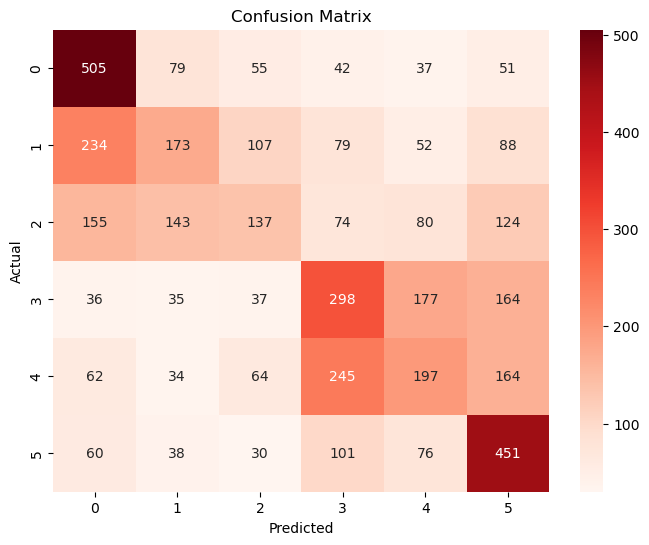

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ...

conf_mat = confusion_matrix(y_val, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 2.1.2 Deep Learning method

In [ ]:
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from transformers import RobertaForSequenceClassification
from transformers import AutoTokenizer, XLMRobertaModel


import numpy as np
from transformers import RobertaTokenizer


Changing Target value from letters to numbers

In [ ]:
possible_labels = subtask2_EN_deep_df.label.unique()
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'A': 0, 'F': 1, 'B': 2, 'D': 3, 'E': 4, 'C': 5}

In [ ]:
subtask2_EN_deep_df['label'] = subtask2_EN_deep_df.label.replace(label_dict)
subtask2_EN_deep_df.head()

,text,label
0,It was not until many years later that it coul...,0
1,Users can then pin these images to their profi...,1
2,The best songs are those that I can sing along...,2
3,I found this book to be poorly written. It was...,3
4,Regulates the application of the EU tariff quo...,4


Data spliting (stratified spliting)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(subtask2_EN_deep_df.index.values,
                                                  subtask2_EN_deep_df.label.values,
                                                  test_size=0.20,
                                                  random_state=42,
                                                  stratify=subtask2_EN_deep_df.label.values)

subtask2_EN_deep_df['data_type'] = ['not_set']*subtask2_EN_deep_df.shape[0]

subtask2_EN_deep_df.loc[X_train, 'data_type'] = 'train'
subtask2_EN_deep_df.loc[X_val, 'data_type'] = 'val'

Tokenizing the data based on the model we are going to use

In [ ]:
tokenizer = BertTokenizer.from_pretrained(#'bert-base-uncased',
                                          #"bert-large-uncased",
                                          "bert-large-cased",
                                          do_lower_case=False)

# tokenizer = RobertaTokenizer.from_pretrained("roberta-base",
#                                           do_lower_case=False)

# tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")


encoded_data_train = tokenizer.batch_encode_plus(
    subtask2_EN_deep_df[subtask2_EN_deep_df.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    subtask2_EN_deep_df[subtask2_EN_deep_df.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']  ### is our tokenize data
attention_masks_train = encoded_data_train['attention_mask'] ### is our attenmask based in the window
labels_train = torch.tensor(subtask2_EN_deep_df[subtask2_EN_deep_df.data_type=='train'].label.values) ## the lables..

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(subtask2_EN_deep_df[subtask2_EN_deep_df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Prepare the model we are going to use for the classification task

In [ ]:
model = BertForSequenceClassification.from_pretrained(#"bert-large-uncased",
                                                      "bert-large-cased",
                                                      num_labels=6,
                                                      output_attentions=True,
                                                      output_hidden_states=True)


# model = RobertaForSequenceClassification.from_pretrained(#"bert-base-uncased",
#                                                       "roberta-base",
#                                                       num_labels=6,
#                                                       output_attentions=True,
#                                                       output_hidden_states=True)

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at 

Batching our dataset

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

seting up the optimizer and scheduler for training the model

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

epochs = 2

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

Functions to evaluate the model

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

Use GPU if available

In [ ]:
import torch

# Just right before the actual usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Training loop

Trained with Bert Large model

In [ ]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    # torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/4483 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.1781622989170923
Validation loss: 0.9891642170237921
F1 Score (Weighted): 0.5237911948000769


Epoch 2:   0%|          | 0/4483 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.8050025409048482
Validation loss: 1.0117387066580301
F1 Score (Weighted): 0.5773274251137684


Validation loss: 1.0117387066580301
F1 Score (Weighted): 0.5773274251137684
Accuracy: 0.5782783229259589


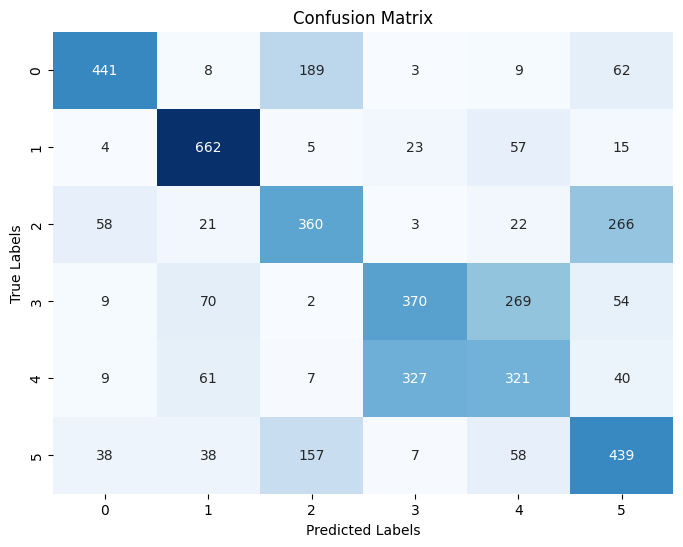

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_accuracy(predictions, true_vals):
    # Convert predicted probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(true_vals, predicted_labels)

    # Calculate confusion matrix
    cm = confusion_matrix(true_vals, predicted_labels)

    return accuracy, cm

# ...

val_loss, predictions, true_vals = evaluate(dataloader_validation)
val_f1 = f1_score_func(predictions, true_vals)
val_accuracy, val_cm = calculate_accuracy(predictions, true_vals)
tqdm.write(f'Validation loss: {val_loss}')
tqdm.write(f'F1 Score (Weighted): {val_f1}')
tqdm.write(f'Accuracy: {val_accuracy}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Model interpretability

In [ ]:
text1 = "I am a bit hungery and my boyfirend is still working, I wish he could coock for me but he is still working, meanwhile I will eat a banana"
text2 = "I am feeling a bit hungry and my boyfriend is still working. Although I wish he could cook for me, I understand he is still occupied. In the meantime, I will have a banana."
text3 ="I'm feeling a little hungry, and unfortunately, my boyfriend is still at work, so I wish he could prepare a meal for me. However, since he's still working, I'll have a banana in the meantime."



text4= "there is this guy who is working on his project at 2 am in the night, instead of sleeping he is working very hard. He should go to sleep soon and he will go to sleep soon or he ll regret it tomorrow"
text5 = "There's a man diligently working on his project at 2 am, sacrificing sleep for his endeavor. It's crucial for him to rest soon, or he will inevitably face regret in the coming day."
text6 = "At 2 am in the night, there's an individual engrossed in his project, putting in tremendous effort instead of getting some sleep. It's imperative for him to prioritize rest and he will soon do so; otherwise, he'll experience regret tomorrow."



text7="hello my name is ALi and I AM WORKIng on this project, I am trying to figure out if my model can detect if this was written by me  or by chat gpt. however this text is written by me and I am trying to type more and more so I can have a large text for my moder for it to be able to classify. again i repeat I wrote this text by myself I am going to have some spelling mistakes like this txt has some porblems! "
text8="Hello, my name is Ali, and I am working on a project. My goal is to determine whether my model can distinguish between text written by me and text generated by ChatGPT. However, this particular text has been written by me, and I am attempting to type more content to provide a substantial amount for my model to classify. I want to emphasize that I authored this text personally. Consequently, there might be some spelling errors and issues within this text, such as the presence of problems in this sentence."
text9= "Greetings, my name is Ali, and I am actively engaged in a project. My objective is to determine whether my model can discern between text originating from me and text generated by ChatGPT. It is important to note that the current text has been personally composed by me, and my aim is to produce an extensive body of text to facilitate accurate classification by my model. Once again, I want to reiterate that I am the sole author of this text, and it is expected to contain some spelling errors, such as the presence of problems in this particular piece of text."

In [ ]:
text = "Your input text goes here."

# Tokenize and encode the text
inputs = tokenizer.encode_plus(
    text9,    ########################## change text here
    add_special_tokens=True,
    max_length=256,
    padding='max_length',
    return_attention_mask=True,
    return_tensors='pt'
)

input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    logits = outputs[0]
    probabilities = torch.nn.functional.softmax(logits, dim=1)

class_probabilities = probabilities.squeeze().tolist()
class_probabilities


[0.0005855885683558881,
 0.7835597395896912,
 0.007033247966319323,
 0.04936901479959488,
 0.06373315304517746,
 0.09571930766105652]

Chat GPT model is likely the 2nd class in the list  --> (model F)

Trianed with Bert Base model

In [ ]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    # torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/4483 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.2023891708945527
Validation loss: 0.9762718960573028
F1 Score (Weighted): 0.5124098117927064


Epoch 2:   0%|          | 0/4483 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.9154132133469853
Validation loss: 1.0907669082918703
F1 Score (Weighted): 0.49452223205683704


Epoch 3:   0%|          | 0/4483 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.7586983398135694
Validation loss: 1.1633947312559378
F1 Score (Weighted): 0.5584045034605095


## **2.2 Subtask 2 --> Spanish**

### 2.2.1 Traditional Machine learning methods

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Preprocessing functions

In [ ]:
# Convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace

    return text


# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)


# Initialize the stemmer
snow = SnowballStemmer('spanish')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

subtask2_ES_df['clean_text'] = subtask2_ES_df['text'].apply(lambda x: finalpreprocess(x))
# subtask1_EN_df=subtask1_EN_df.drop(columns=['word_count','char_count','unique_word_count'])
subtask2_ES_df.head()

,text,label,clean_text
0,"Sin embargo, los jóvenes son capaces de recono...",B,sin embargo los jóvenes son capaces de reconoc...
1,¿Hay algo más que quieras compartir? ¿Algo sob...,B,hay algo más que quieras compartir algo sobre ...
2,"El servicio de sala es bueno, rápido y amabilí...",B,el servicio de sala e bueno rápido amabilísimo...
3,"Para concentrarse en el hablante, trata de des...",F,para concentrarse en el hablante trata de desc...
4,Los responsables locales tendrán ahora que esp...,F,los responsables locales tendrán ahora que esp...


Tockenizing

In [ ]:
import random

# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
subtask2_ES_df['clean_text_tok']=[nltk.word_tokenize(i) for i in subtask2_ES_df['text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(subtask2_ES_df['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector


class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

Data spliting (stratified spliting)

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION

# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(subtask2_ES_df["text"],
                                                  subtask2_ES_df["label"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

Logistic Regression(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))


              precision    recall  f1-score   support

           A       0.49      0.52      0.50       673
           B       0.36      0.32      0.34       690
           C       0.37      0.34      0.35       721
           D       0.47      0.56      0.51       733
           E       0.38      0.36      0.37       757
           F       0.67      0.66      0.67       813

    accuracy                           0.47      4387
   macro avg       0.46      0.46      0.46      4387
weighted avg       0.46      0.47      0.46      4387

Confusion Matrix: 
 [[350 114 106  28  38  37]
 [151 220 165  44  64  46]
 [119 164 244  64  75  55]
 [ 20  30  35 414 188  46]
 [ 33  39  64 265 273  83]
 [ 43  43  42  66  80 539]]


Naive Bayes(tf-idf)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           A       0.38      0.48      0.43       673
           B       0.28      0.33      0.30       690
           C       0.33      0.24      0.28       721
           D       0.40      0.53      0.46       733
           E       0.37      0.26      0.30       757
           F       0.64      0.58      0.61       813

    accuracy                           0.40      4387
   macro avg       0.40      0.40      0.40      4387
weighted avg       0.41      0.40      0.40      4387

Confusion Matrix: 
 [[325 147  76  60  39  26]
 [191 226 112  81  46  34]
 [166 196 172  80  58  49]
 [ 42  70  41 387 131  62]
 [ 55  92  62 262 195  91]
 [ 74  68  59  87  56 469]]


Logistic Regression (W2v)

In [ ]:
# FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]


print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           A       0.45      0.63      0.53       673
           B       0.34      0.20      0.25       690
           C       0.35      0.25      0.29       721
           D       0.42      0.58      0.48       733
           E       0.33      0.23      0.27       757
           F       0.49      0.60      0.54       813

    accuracy                           0.42      4387
   macro avg       0.40      0.41      0.39      4387
weighted avg       0.40      0.42      0.40      4387

Confusion Matrix: 
 [[425  65  54  45  37  47]
 [214 135 133  58  50 100]
 [171 122 182  70  78  98]
 [ 33  26  31 423 105 115]
 [ 49  32  59 304 172 141]
 [ 48  22  57 118  77 491]]


### 2.2.2 Deep Learning method

In [ ]:
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from transformers import RobertaForSequenceClassification
from transformers import AutoTokenizer, XLMRobertaModel


import numpy as np
from transformers import RobertaTokenizer


Changing Target value from letters to numbers

In [ ]:
possible_labels = subtask2_ES_deep_df.label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

subtask2_ES_deep_df['label'] = subtask2_ES_deep_df.label.replace(label_dict)
subtask2_ES_deep_df.head()

,text,label
0,"Sin embargo, los jóvenes son capaces de recono...",0
1,¿Hay algo más que quieras compartir? ¿Algo sob...,0
2,"El servicio de sala es bueno, rápido y amabilí...",0
3,"Para concentrarse en el hablante, trata de des...",1
4,Los responsables locales tendrán ahora que esp...,1


Data spliting (stratified spliting)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(subtask2_ES_deep_df.index.values,
                                                  subtask2_ES_deep_df.label.values,
                                                  test_size=0.20,
                                                  random_state=42,
                                                  stratify=subtask2_ES_deep_df.label.values)

subtask2_ES_deep_df['data_type'] = ['not_set']*subtask2_ES_deep_df.shape[0]

subtask2_ES_deep_df.loc[X_train, 'data_type'] = 'train'
subtask2_ES_deep_df.loc[X_val, 'data_type'] = 'val'

Tokenizing the data based on the model we are going to use

In [ ]:
tokenizer = BertTokenizer.from_pretrained(#'bert-base-uncased',
                                          "bert-base-multilingual-cased",
                                          do_lower_case=False)

# tokenizer = RobertaTokenizer.from_pretrained("roberta-base",
#                                           do_lower_case=True)

# tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")


encoded_data_train = tokenizer.batch_encode_plus(
    subtask2_ES_deep_df[subtask2_ES_deep_df.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    subtask2_ES_deep_df[subtask2_ES_deep_df.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']  ### is our tokenize data
attention_masks_train = encoded_data_train['attention_mask'] ### is our attenmask based in the window
labels_train = torch.tensor(subtask2_ES_deep_df[subtask2_ES_deep_df.data_type=='train'].label.values) ## the lables..

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(subtask2_ES_deep_df[subtask2_ES_deep_df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Prepare the model that we are going to use for the classification task

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased",
                                                      num_labels=6,
                                                      output_attentions=False,
                                                      output_hidden_states=False)


# model = RobertaForSequenceClassification.from_pretrained(#"bert-base-uncased",
#                                                       "roberta-base",
#                                                       num_labels=6,
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

Batching our dataset

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

seting up the optimizer and scheduler for training the model

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

epochs = 3

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

Functions to evaluate the model

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

Use GPU if available

In [ ]:
import torch

# Just right before the actual usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Training loop

In [ ]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    # torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/4387 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.1839029200957607
Validation loss: 1.0048141772149906
F1 Score (Weighted): 0.5249368085417958


Epoch 2:   0%|          | 0/4387 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.889466773687601
Validation loss: 0.9310708809576066
F1 Score (Weighted): 0.5802642626761759


Epoch 3:   0%|          | 0/4387 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.7253059811719443
Validation loss: 1.0409332544754244
F1 Score (Weighted): 0.580836997893245


The end!

Thank you for scrolling all this way!